# <center>VGG net</center>

In [172]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

#### use VGG16 Model trained by imagenet

In [173]:
model = VGG16(weights= 'imagenet')

#### Read Image

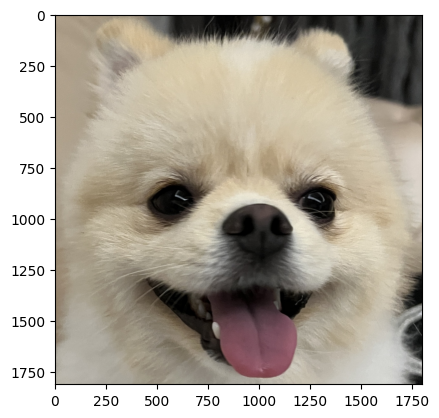

In [212]:
image = cv2.imread('animal_test_img/test_img_9.1.jpeg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

#### Resize Image

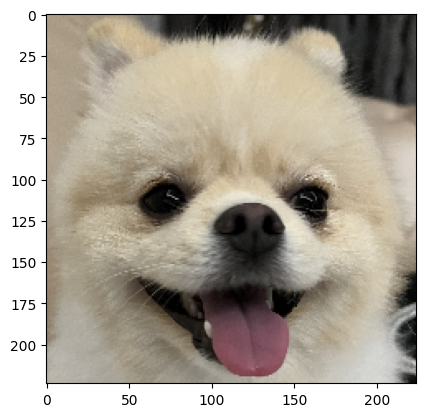

In [213]:
resized_image = cv2.resize(image, dsize=(224,224)) # VGG16 default input size is 224^2
plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))

#### Preprocessing

In [214]:
resized_image= img_to_array(resized_image)
resized_image = resized_image.reshape((1, resized_image.shape[0] , resized_image.shape[1],resized_image.shape[2]))
resized_image = preprocess_input(resized_image)

#### Fit to Model

In [215]:
yhat = model.predict(resized_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


#### Result

In [216]:
label = decode_predictions(yhat)
label = label[0]
print('Top 1: ',label[0][1], label[0][2]*100)
print('Top 2: ',label[1][1], label[1][2]*100)
print('Top 3: ',label[2][1], label[2][2]*100)
print('Top 4: ',label[3][1], label[3][2]*100)


Top 1:  Pomeranian 69.72661
Top 2:  Chihuahua 11.542548
Top 3:  Pekinese 3.5279274
Top 4:  Samoyed 2.9397573


## Result

#### *Resizing image without cropping decreases the prediction drastically

#### *For better prediction, image should be crop containing major characteristic feature